# Task 1: data explores, cleans, and generates new features
#Task 2: test and optimization of random forest

In [2]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [90]:
import os
os.chdir("/Users/xiamenglin/Desktop/credit-risk/credit_risk")


#Importing data
df_credit = pd.read_csv("./german_credit_data.csv")
print(df_credit.shape)


(1000, 11)


#check dataframe
#delete missing values
#delete extream values -> plt.hist()

In [94]:
df_credit=df_credit.iloc[:,1:]
df_credit = df_credit.dropna() #drop nan
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [34]:
df_credit.nunique()
#df_credit.info()
#df_credit.describe()

Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [47]:
print(df_credit.Housing.unique())
print(df_credit["Saving accounts"].unique())
print(df_credit["Checking account"].unique())
print(df_credit["Purpose"].unique())
print(df_credit["Risk"].unique())


['own' 'free' 'rent']
['little' 'moderate' 'quite rich' 'rich']
['moderate' 'little' 'rich']
['radio/TV' 'furniture/equipment' 'car' 'business' 'domestic appliances'
 'repairs' 'vacation/others' 'education']
['bad' 'good']


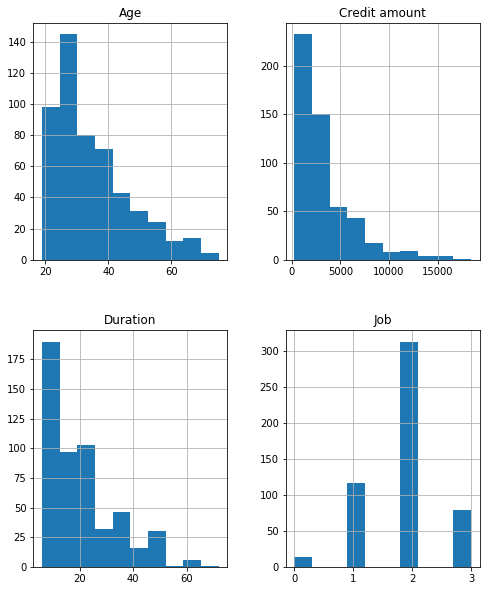

In [81]:
#fig size
plt.rcParams["figure.figsize"] = (8,10)

df_credit.hist()
plt.show()


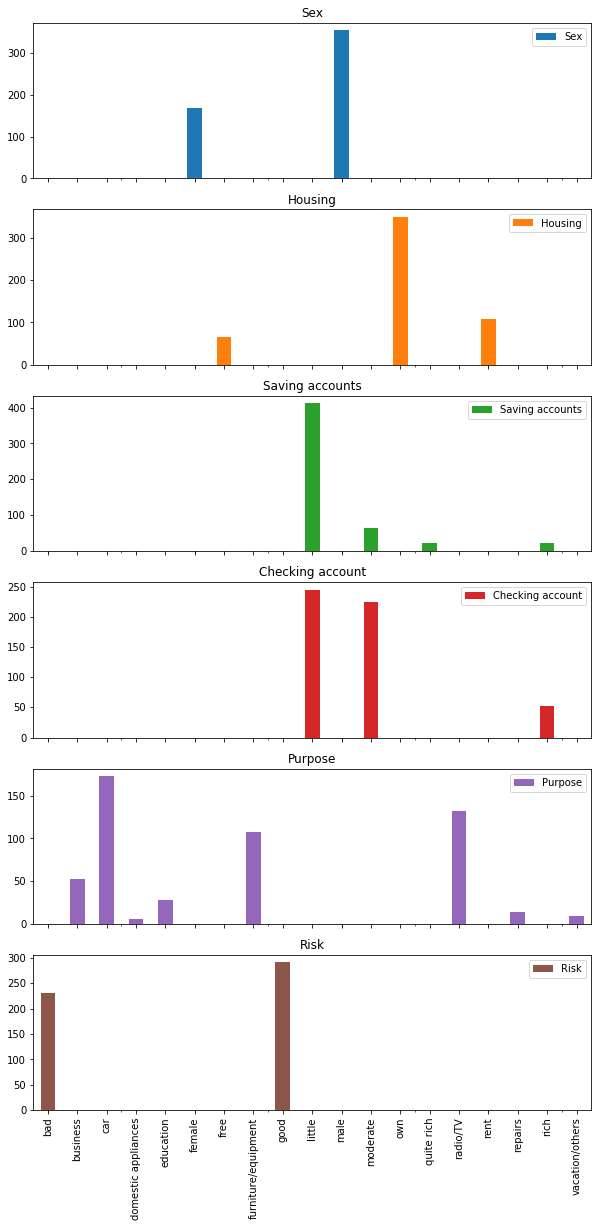

In [77]:
df_sub = df_credit.iloc[:,[1,3,4,5,8,9]]
plt.rcParams["figure.figsize"] = (10,20) #fig size
df_sub.apply(pd.value_counts).plot(kind='bar', subplots=True)
plt.show()


##Data descriptions

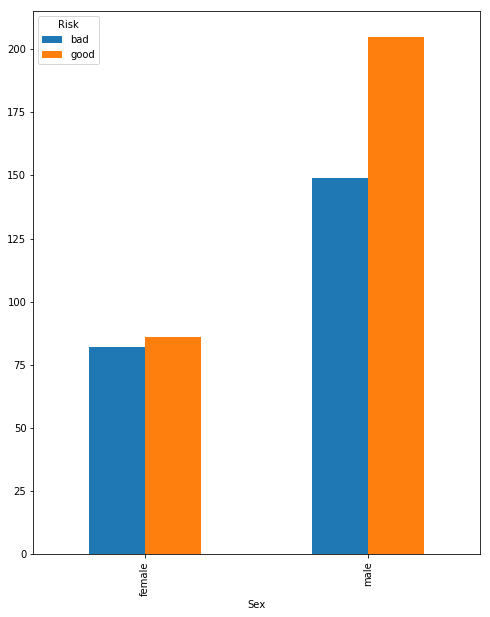

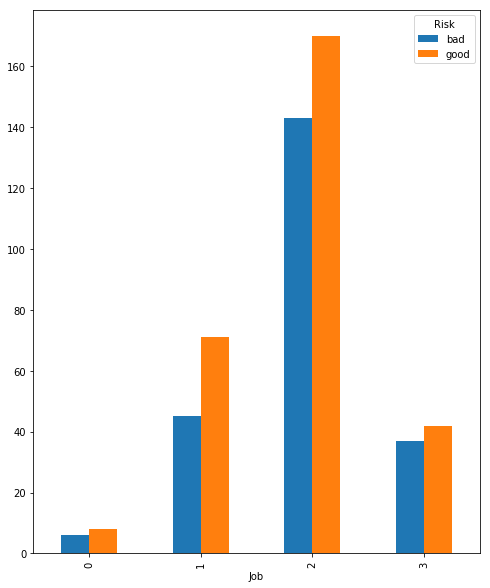

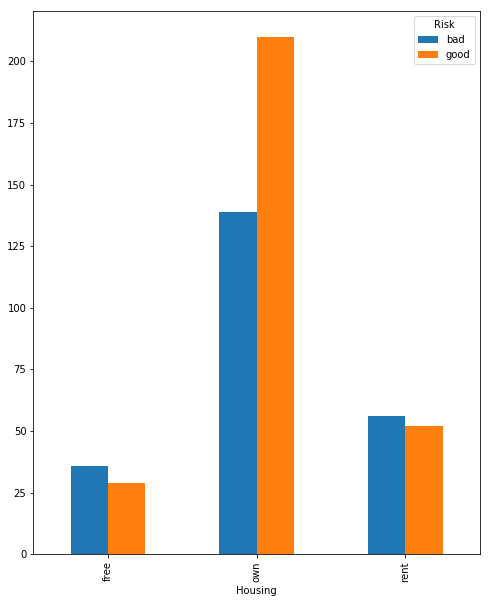

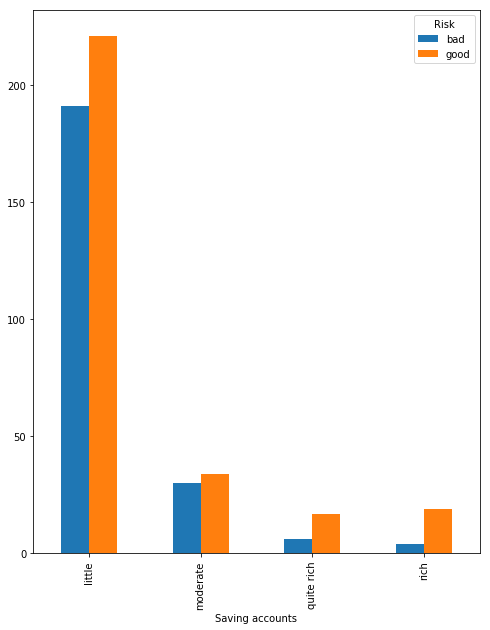

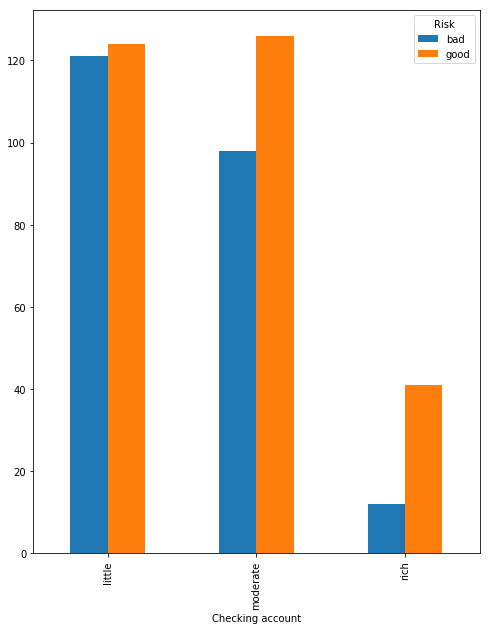

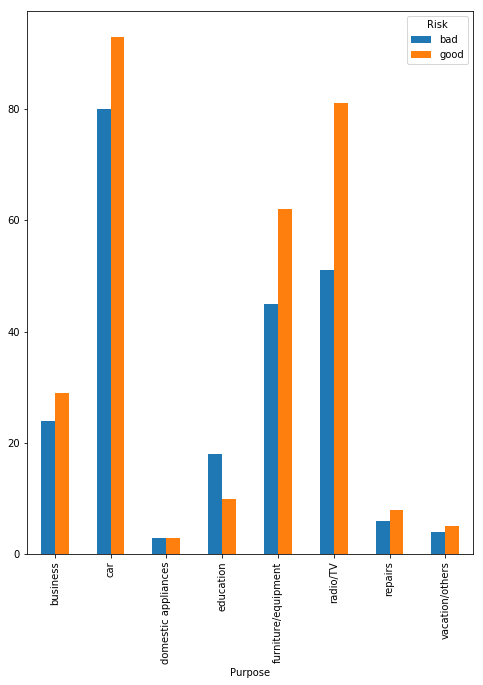

In [89]:
#Categorical -> crosstab, 
pd.crosstab(df_credit.Sex, df_credit.Risk).plot.bar()
pd.crosstab(df_credit.Job, df_credit.Risk).plot.bar()
pd.crosstab(df_credit.Housing, df_credit.Risk).plot.bar()
pd.crosstab(df_credit['Saving accounts'], df_credit.Risk).plot.bar()
pd.crosstab(df_credit['Checking account'], df_credit.Risk).plot.bar()
pd.crosstab(df_credit['Purpose'], df_credit.Risk).plot.bar()
plt.show()




In [102]:
feature_char=list(df_credit.drop(['Age','Job','Credit amount','Duration'] ,axis=1))

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_credit_old = df_credit.copy()

df_credit[feature_char] = df_credit[feature_char].apply(lb_make.fit_transform)
df_credit.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,0


In [103]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = list(df_credit.drop('Risk' ,axis=1))
X = df_credit[feature_names]
y = df_credit['Risk']



In [104]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

/Users/xiamenglin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



 # Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.66


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.66


# K-Nearest Neighbors


In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.59


# Linear Discriminant Analysis


In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.65
Accuracy of LDA classifier on test set: 0.63


# Gaussian Naive Bayes


In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.63
Accuracy of GNB classifier on test set: 0.61


# Support Vector Machine


In [111]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.66
Accuracy of SVM classifier on test set: 0.64


# Confusion Matrix KNN

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[23 28]
 [26 54]]
             precision    recall  f1-score   support

          0       0.47      0.45      0.46        51
          1       0.66      0.68      0.67        80

avg / total       0.58      0.59      0.59       131



# Plot the Decision Boundary of the k-NN Classifier


https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2